In [239]:
import pandas as pd # importing pandas
import matplotlib.pyplot as plt
import numpy as np

In [240]:
df = pd.read_csv('closest/stopcodonsprojections.bed', sep='\t', header=None) # looking at bed file in system

/Users/brendagaribay/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,6,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [241]:
# TODO: rename all columns of DF
# Link for info: http://genome.ucsc.edu/FAQ/FAQformat#format1
# Fix renaming, dont know thick column and following (not specified)

In [242]:
# Obtaining labels for columns using link by making a list and then function to rename
df_cols = ['chrom', 'chromstart', 'chromend', 'name', 'score', 'strand', 'chrom', 'source', 'feature', 'thickstart', 'thickend', 'score/strand', 'strand', 'score', 'geneinfo', 'distance']
df.columns = df_cols
df.head()

,chrom,chromstart,chromend,name,score,strand,chrom,source,feature,thickstart,thickend,score/strand,strand,score,geneinfo,distance
0,1,237714,237774,NB501950:174:H3TG7BGXC:1:21312:9623:5666,1,-,1,ensembl,stop_codon,708063,708065,.,+,0,"gene_id ""ENSRNOG00000047964""; gene_version ""2""...",470289
1,1,249309,249338,NB501950:174:H3TG7BGXC:3:21510:22302:5993,1,-,1,ensembl,stop_codon,708063,708065,.,+,0,"gene_id ""ENSRNOG00000047964""; gene_version ""2""...",458725
2,1,522843,522903,NB501950:174:H3TG7BGXC:1:21201:11349:16379,1,-,1,ensembl,stop_codon,708063,708065,.,+,0,"gene_id ""ENSRNOG00000047964""; gene_version ""2""...",185160
3,1,522844,522904,NB501950:174:H3TG7BGXC:3:12501:19506:2957,1,-,1,ensembl,stop_codon,708063,708065,.,+,0,"gene_id ""ENSRNOG00000047964""; gene_version ""2""...",185159
4,1,1133040,1133100,NB501950:174:H3TG7BGXC:2:22312:4435:9384,1,-,1,ensembl,stop_codon,1101965,1101967,.,-,0,"gene_id ""ENSRNOG00000040300""; gene_version ""4""...",-31074


In [243]:
# TODO: parse gene info into a few columns of interest
# string splitting
# a.split('gene_name')[1].split('; ')[0].strip().strip('"')
# df[['gene_id', 'gene_name', 'exon_number', 'gene_biotype']] = df['geneinfo'].str.split(';', n=12, expand=True)
# pd.set_option('max_colwidth', None)
# df[['geneinfo']].head()
# extraction feels repetitive, how to make loop with variable input or empty list []

In [244]:
# Function to parse column into new column
def extract_gene_name(metadata):
    '''function take a section of string in df column called gene_name and splits into a column only what is followed after the label input string in column output is section of string in new column'''
    if len(metadata.split('gene_name')) > 1:
        return metadata.split('gene_name')[1].split('; ')[0].strip().strip('"')
    else:
        return None

df['gene_name'] = df['geneinfo'].apply(extract_gene_name) # calls on function and looks into column by applying input of what is being parsed

In [245]:
def extract_gene_id(metadata):
    if len(metadata.split('gene_id')) > 1:
        return metadata.split('gene_id')[1].split('; ')[0].strip().strip('"')
    else:
        return None

df['gene_id'] = df['geneinfo'].apply(extract_gene_name)

In [246]:
def extract_exon_number(metadata):
    if len(metadata.split('exon_number')) > 1:
        return metadata.split('exon_number')[1].split('; ')[0].strip().strip('"')
    else:
        return None

df['exon_number'] = df['geneinfo'].apply(extract_gene_name)

In [247]:
def extract_gene_biotype(metadata):
    if len(metadata.split('gene_biotype')) > 1:
        return metadata.split('gene_biotype')[1].split('; ')[0].strip().strip('"')
    else:
        return None

df['gene_biotype'] = df['geneinfo'].apply(extract_gene_name)
df.head()

,chrom,chromstart,chromend,name,score,strand,chrom,source,feature,thickstart,thickend,score/strand,strand,score,geneinfo,distance,gene_name,gene_id,exon_number,gene_biotype
0,1,237714,237774,NB501950:174:H3TG7BGXC:1:21312:9623:5666,1,-,1,ensembl,stop_codon,708063,708065,.,+,0,"gene_id ""ENSRNOG00000047964""; gene_version ""2""...",470289,AABR07000089.1,AABR07000089.1,AABR07000089.1,AABR07000089.1
1,1,249309,249338,NB501950:174:H3TG7BGXC:3:21510:22302:5993,1,-,1,ensembl,stop_codon,708063,708065,.,+,0,"gene_id ""ENSRNOG00000047964""; gene_version ""2""...",458725,AABR07000089.1,AABR07000089.1,AABR07000089.1,AABR07000089.1
2,1,522843,522903,NB501950:174:H3TG7BGXC:1:21201:11349:16379,1,-,1,ensembl,stop_codon,708063,708065,.,+,0,"gene_id ""ENSRNOG00000047964""; gene_version ""2""...",185160,AABR07000089.1,AABR07000089.1,AABR07000089.1,AABR07000089.1
3,1,522844,522904,NB501950:174:H3TG7BGXC:3:12501:19506:2957,1,-,1,ensembl,stop_codon,708063,708065,.,+,0,"gene_id ""ENSRNOG00000047964""; gene_version ""2""...",185159,AABR07000089.1,AABR07000089.1,AABR07000089.1,AABR07000089.1
4,1,1133040,1133100,NB501950:174:H3TG7BGXC:2:22312:4435:9384,1,-,1,ensembl,stop_codon,1101965,1101967,.,-,0,"gene_id ""ENSRNOG00000040300""; gene_version ""4""...",-31074,Raet1e,Raet1e,Raet1e,Raet1e


In [248]:
# TODO: Subeset to only include rows with distance of max 10,000

In [249]:
df = df[abs(df.distance) <= 10000] # data looks for column that has values > 10000 and filters into df
df.head()

,chrom,chromstart,chromend,name,score,strand,chrom,source,feature,thickstart,thickend,score/strand,strand,score,geneinfo,distance,gene_name,gene_id,exon_number,gene_biotype
17,1,1731005,1731062,NB501950:174:H3TG7BGXC:3:13403:8002:7462,42,+,1,ensembl,stop_codon,1729595,1729597,.,+,0,"gene_id ""ENSRNOG00000014303""; gene_version ""6""...",-1409,Lrp11,Lrp11,Lrp11,Lrp11
18,1,1731101,1731161,NB501950:174:H3TG7BGXC:1:23206:4286:13989,42,+,1,ensembl,stop_codon,1729595,1729597,.,+,0,"gene_id ""ENSRNOG00000014303""; gene_version ""6""...",-1505,Lrp11,Lrp11,Lrp11,Lrp11
19,1,1731102,1731162,NB501950:174:H3TG7BGXC:2:23110:9193:15795,42,+,1,ensembl,stop_codon,1729595,1729597,.,+,0,"gene_id ""ENSRNOG00000014303""; gene_version ""6""...",-1506,Lrp11,Lrp11,Lrp11,Lrp11
20,1,1731102,1731162,NB501950:174:H3TG7BGXC:1:21309:13142:4294,42,+,1,ensembl,stop_codon,1729595,1729597,.,+,0,"gene_id ""ENSRNOG00000014303""; gene_version ""6""...",-1506,Lrp11,Lrp11,Lrp11,Lrp11
21,1,1731128,1731185,NB501950:174:H3TG7BGXC:3:12608:6445:12334,42,+,1,ensembl,stop_codon,1729595,1729597,.,+,0,"gene_id ""ENSRNOG00000014303""; gene_version ""6""...",-1532,Lrp11,Lrp11,Lrp11,Lrp11


In [250]:
# TODO: Re-remember what postivie vs negative distance means from bedtools closest

In [251]:
# TODO: make a dataframe for just the Mbp gene rows. Make a histogram where x axis is gene coordinate and y axis is number of reads
len(set(df['gene_name']))

9536

In [252]:
mbp_df = df[df['gene_name'] == 'Mbp']
mbp_df

,chrom,chromstart,chromend,name,score,strand,chrom,source,feature,thickstart,thickend,score/strand,strand,score,geneinfo,distance,gene_name,gene_id,exon_number,gene_biotype
278106,18,79408156,79408213,NB501950:174:H3TG7BGXC:2:13108:21126:9090,42,+,18,ensembl,stop_codon,79406650,79406652,.,+,0,"gene_id ""ENSRNOG00000016516""; gene_version ""8""...",-1505,Mbp,Mbp,Mbp,Mbp
278107,18,79408185,79408245,NB501950:174:H3TG7BGXC:2:13312:3971:16474,42,+,18,ensembl,stop_codon,79406650,79406652,.,+,0,"gene_id ""ENSRNOG00000016516""; gene_version ""8""...",-1534,Mbp,Mbp,Mbp,Mbp
278108,18,79410103,79410163,NB501950:174:H3TG7BGXC:2:12209:19093:14831,42,+,18,ensembl,stop_codon,79406650,79406652,.,+,0,"gene_id ""ENSRNOG00000016516""; gene_version ""8""...",-3452,Mbp,Mbp,Mbp,Mbp
278109,18,79410366,79410426,NB501950:174:H3TG7BGXC:4:13605:15255:1225,42,+,18,ensembl,stop_codon,79406650,79406652,.,+,0,"gene_id ""ENSRNOG00000016516""; gene_version ""8""...",-3715,Mbp,Mbp,Mbp,Mbp
278110,18,79410367,79410427,NB501950:174:H3TG7BGXC:1:13110:2627:6857,42,+,18,ensembl,stop_codon,79406650,79406652,.,+,0,"gene_id ""ENSRNOG00000016516""; gene_version ""8""...",-3716,Mbp,Mbp,Mbp,Mbp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484388,18,79441272,79441329,NB501950:174:H3TG7BGXC:3:13608:22051:6319,42,+,18,ensembl,stop_codon,79435813,79435815,.,+,0,"gene_id ""ENSRNOG00000016516""; gene_version ""8""...",-5458,Mbp,Mbp,Mbp,Mbp
484389,18,79441275,79441329,NB501950:174:H3TG7BGXC:1:11309:11471:6143,42,+,18,ensembl,stop_codon,79435813,79435815,.,+,0,"gene_id ""ENSRNOG00000016516""; gene_version ""8""...",-5461,Mbp,Mbp,Mbp,Mbp
484390,18,79441275,79441329,NB501950:174:H3TG7BGXC:1:11309:11471:6143,42,+,18,ensembl,stop_codon,79435813,79435815,.,+,0,"gene_id ""ENSRNOG00000016516""; gene_version ""8""...",-5461,Mbp,Mbp,Mbp,Mbp
484391,18,79441275,79441329,NB501950:174:H3TG7BGXC:1:11309:11471:6143,42,+,18,ensembl,stop_codon,79435813,79435815,.,+,0,"gene_id ""ENSRNOG00000016516""; gene_version ""8""...",-5461,Mbp,Mbp,Mbp,Mbp


(0.0, 2000.0)

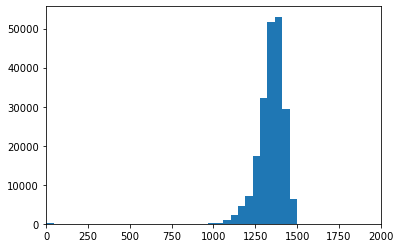

In [253]:
plt.hist(abs(mbp_df['distance']), bins=150)# plotted distance of gene in UTR vs abundance
plt.xlim([0,2000])

In [254]:
mobp_df = df[df['gene_name'] == 'Mobp']
mobp_df

,chrom,chromstart,chromend,name,score,strand,chrom,source,feature,thickstart,thickend,score/strand,strand,score,geneinfo,distance,gene_name,gene_id,exon_number,gene_biotype
729861,8,128842613,128842673,NB501950:174:H3TG7BGXC:2:21309:14063:1476,42,+,8,ensembl,stop_codon,128842607,128842609,.,+,0,"gene_id ""ENSRNOG00000018700""; gene_version ""8""...",-5,Mobp,Mobp,Mobp,Mobp
729862,8,128842615,128842673,NB501950:174:H3TG7BGXC:2:12312:8665:15745,3,+,8,ensembl,stop_codon,128842607,128842609,.,+,0,"gene_id ""ENSRNOG00000018700""; gene_version ""8""...",-7,Mobp,Mobp,Mobp,Mobp
729863,8,128842617,128842677,NB501950:185:HHL3YBGXC:2:12203:15541:14019,42,+,8,ensembl,stop_codon,128842607,128842609,.,+,0,"gene_id ""ENSRNOG00000018700""; gene_version ""8""...",-9,Mobp,Mobp,Mobp,Mobp
729864,8,128842617,128842677,NB501950:185:HHL3YBGXC:1:22308:14575:3306,42,+,8,ensembl,stop_codon,128842607,128842609,.,+,0,"gene_id ""ENSRNOG00000018700""; gene_version ""8""...",-9,Mobp,Mobp,Mobp,Mobp
729865,8,128842618,128842675,NB501950:174:H3TG7BGXC:4:22403:25569:6142,42,+,8,ensembl,stop_codon,128842607,128842609,.,+,0,"gene_id ""ENSRNOG00000018700""; gene_version ""8""...",-10,Mobp,Mobp,Mobp,Mobp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732391,8,128855649,128855709,NB501950:174:H3TG7BGXC:3:22605:22350:10140,42,+,8,ensembl,stop_codon,128846988,128846990,.,+,0,"gene_id ""ENSRNOG00000018700""; gene_version ""8""...",-8660,Mobp,Mobp,Mobp,Mobp
732392,8,128855656,128855716,NB501950:174:H3TG7BGXC:1:23102:18133:10190,42,+,8,ensembl,stop_codon,128846988,128846990,.,+,0,"gene_id ""ENSRNOG00000018700""; gene_version ""8""...",-8667,Mobp,Mobp,Mobp,Mobp
732393,8,128855657,128855717,NB501950:174:H3TG7BGXC:2:21203:5869:1210,23,+,8,ensembl,stop_codon,128846988,128846990,.,+,0,"gene_id ""ENSRNOG00000018700""; gene_version ""8""...",-8668,Mobp,Mobp,Mobp,Mobp
732394,8,128856555,128856603,NB501950:174:H3TG7BGXC:4:11606:19296:15944,38,+,8,ensembl,stop_codon,128846988,128846990,.,+,0,"gene_id ""ENSRNOG00000018700""; gene_version ""8""...",-9566,Mobp,Mobp,Mobp,Mobp


<module 'matplotlib.pyplot' from '/Users/brendagaribay/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

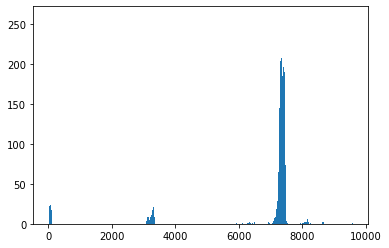

In [255]:
mobp_density = plt.hist(abs(mobp_df['distance']), bins=500)[0]
plt # noticing specific peaks

### 3' UTR Peak calling through rolling averages

See here for demo/info on the overall concept: https://stackoverflow.com/questions/22583391/peak-signal-detection-in-realtime-timeseries-data


1. Write a function that computes the rolling average of a list of numbers, given window size
 input: a list of numbers, window size
 output: a list of rolling averages

2. Write a function that computes the rolling standard deviation of a list of numbers, given window size

3. Using the input values, find all of the places where we are exeeding the threshold

In [256]:
# import dependencies

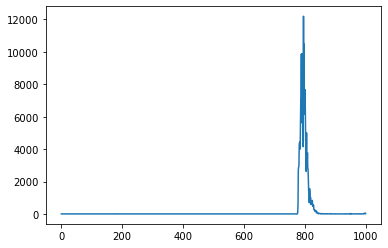

In [257]:
mbp_hist_y, mbp_hist_x = np.histogram(mbp_df['distance'], bins=1000)

plt.plot(mbp_hist_y)

# TODO: Use find_peaks scipy command to find peaks of this histogram
# isoform calling 

In [258]:
# Scipy function: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
# import dependencies
from scipy.signal import find_peaks

In [237]:
set(mobp_df['exon_number'])

{'3', '4'}

[3, 330, 735]

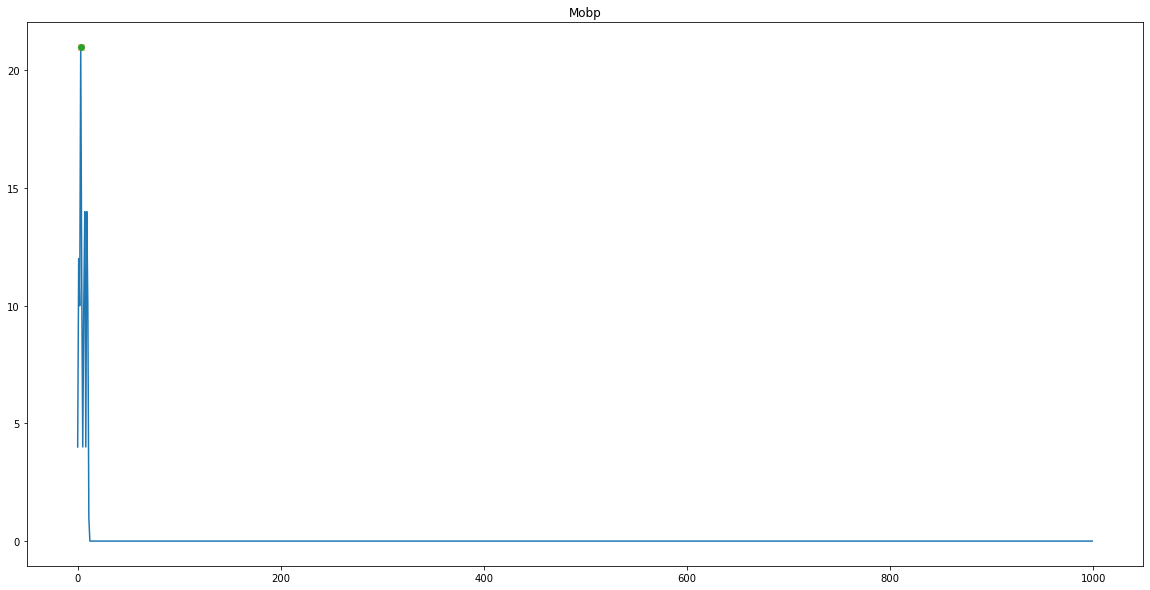

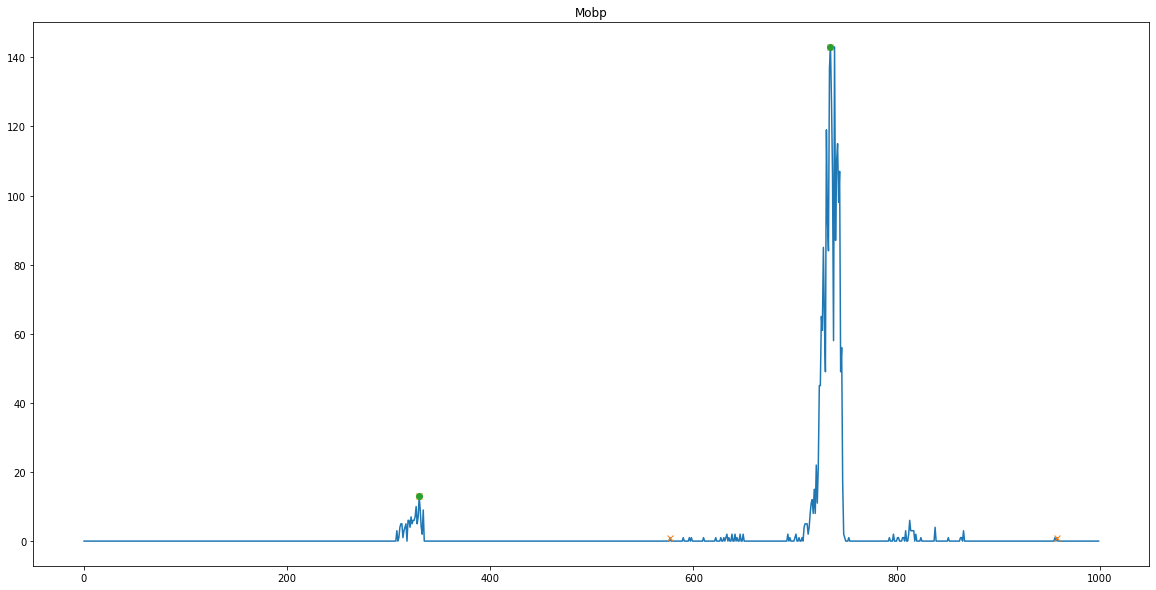

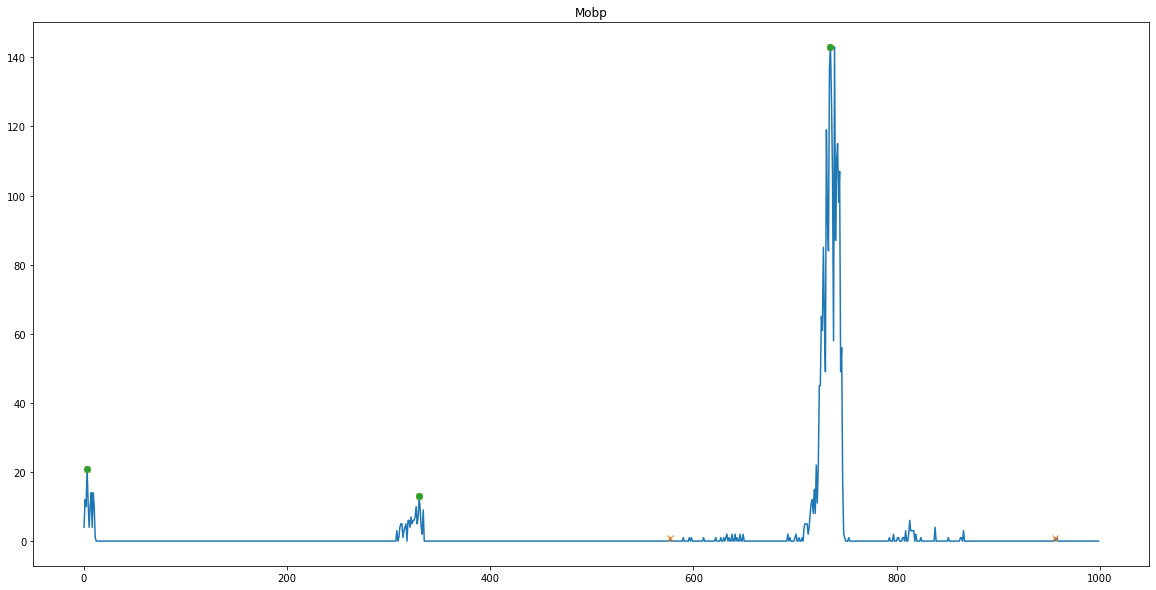

In [238]:
def count_peaks(df):
    df_hist_y, df_hist_x = np.histogram(abs(df['distance']), bins=1000, range=(0, 10000))
    peaks, __ = find_peaks(df_hist_y, distance=150)
    
    filtered_peaks = []
    
    for peak in peaks:
        if df_hist_y[peak] > 0.001*sum(df_hist_y) and df_hist_y[peak] >= 5:
            filtered_peaks.append(peak)
    
    plt.figure(figsize=(20,10))
    plt.plot(df_hist_y)
    plt.plot(peaks, df_hist_y[peaks], 'x')
    plt.plot(filtered_peaks, df_hist_y[filtered_peaks], 'o')
    plt.title(list(df['gene_name'])[0])
    
    return filtered_peaks

count_peaks(mobp_df[mobp_df['exon_number'] == '3'])
count_peaks(mobp_df[mobp_df['exon_number'] == '4'])
count_peaks(mobp_df)

In [229]:
set(mobp_df['exon_number'])

{'3', '4'}

In [215]:
fdf = df.groupby('gene_name').filter(lambda x: len(x) > 10000)

unique_gene_names = list(set(fdf['gene_name']))

unique_gene_names

['Mt-co1', 'Mbp']

Rpl35 [10, 459] {'4'}
Tubb4a [585, 740, 902] {'4'}
Sirt2 [182] {'15', '16'}
Mt-atp6 [9, 318, 545] {'1'}
Cfl1 [221] {'4'}
Mbp [204] {'7', '5', '6', '4'}
Mt-nd5 [215, 771, 946] {'1'}
Septin4 [3] {'10', '9', '12', '11'}
Plp1 [160, 815] {'7'}
Scd2 [986] {'6'}


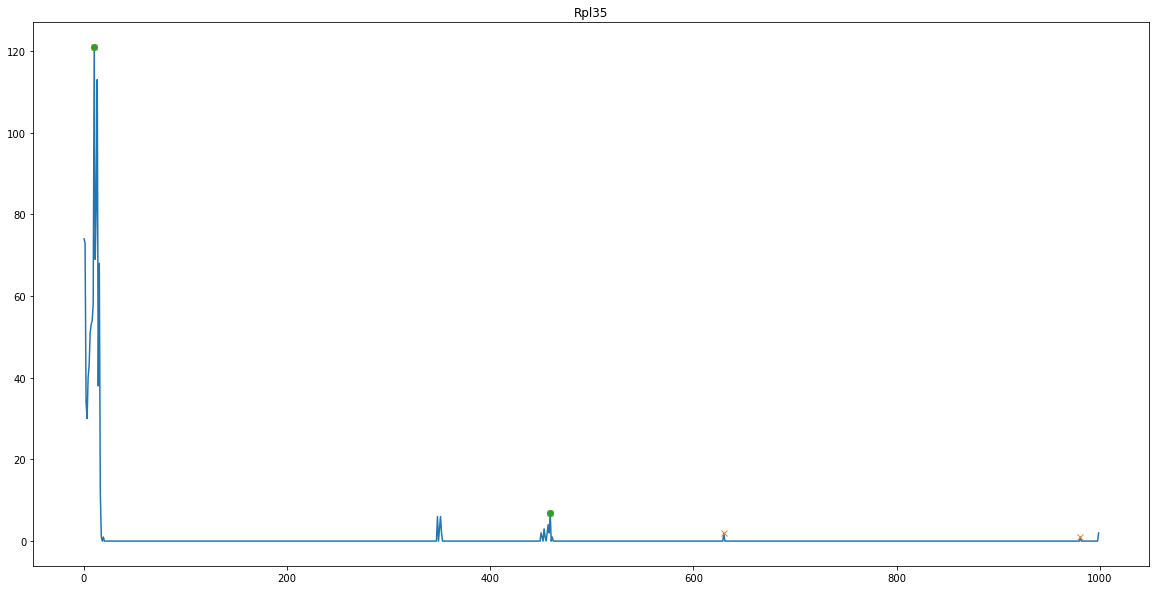

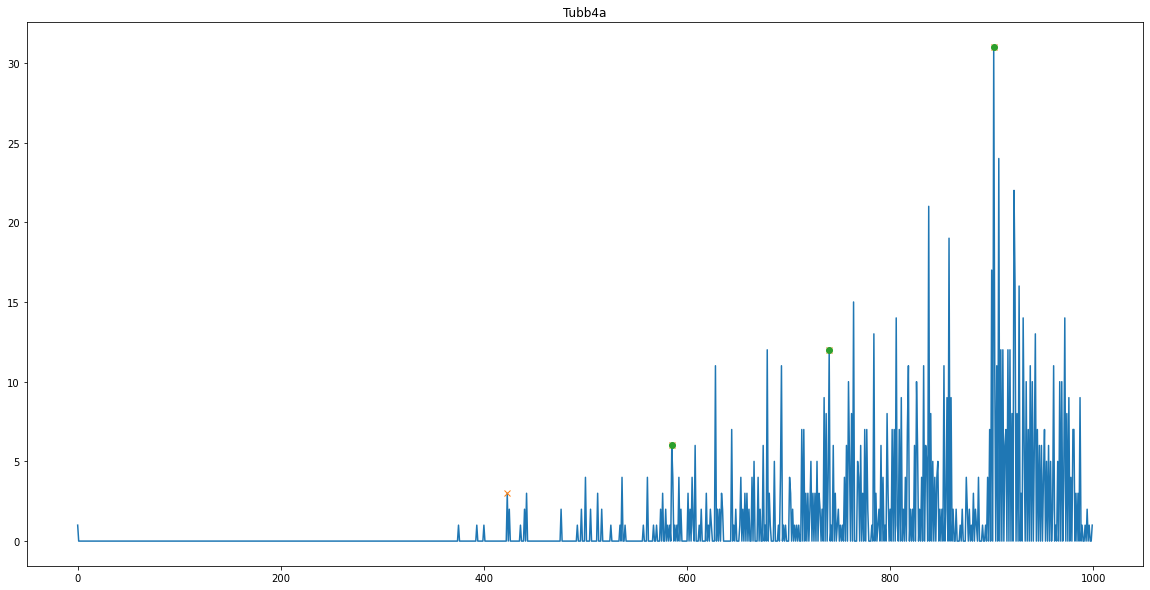

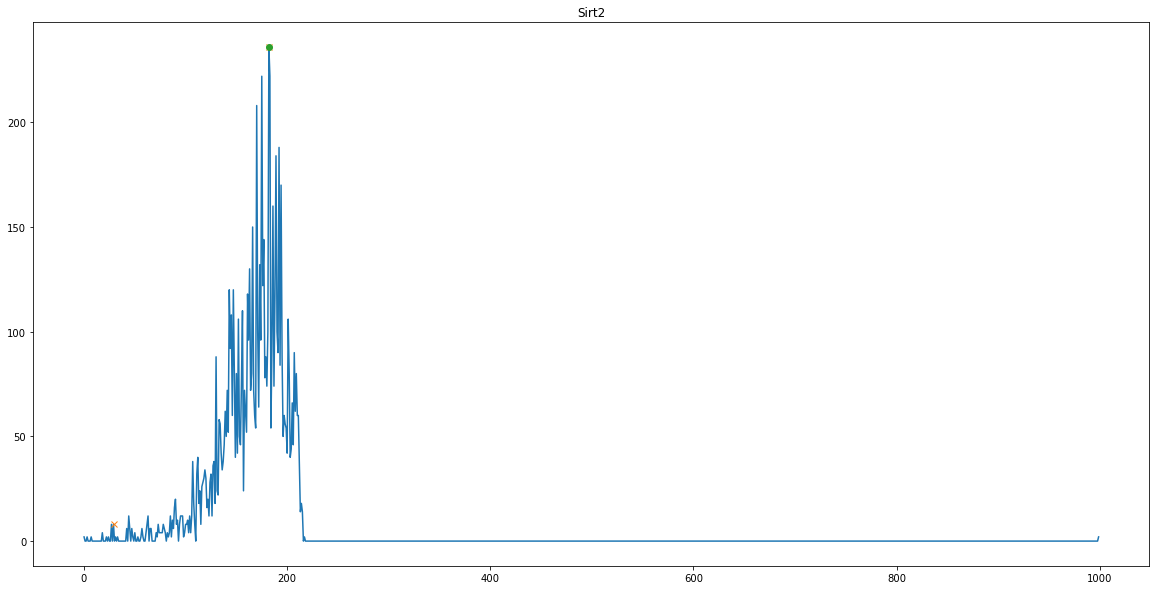

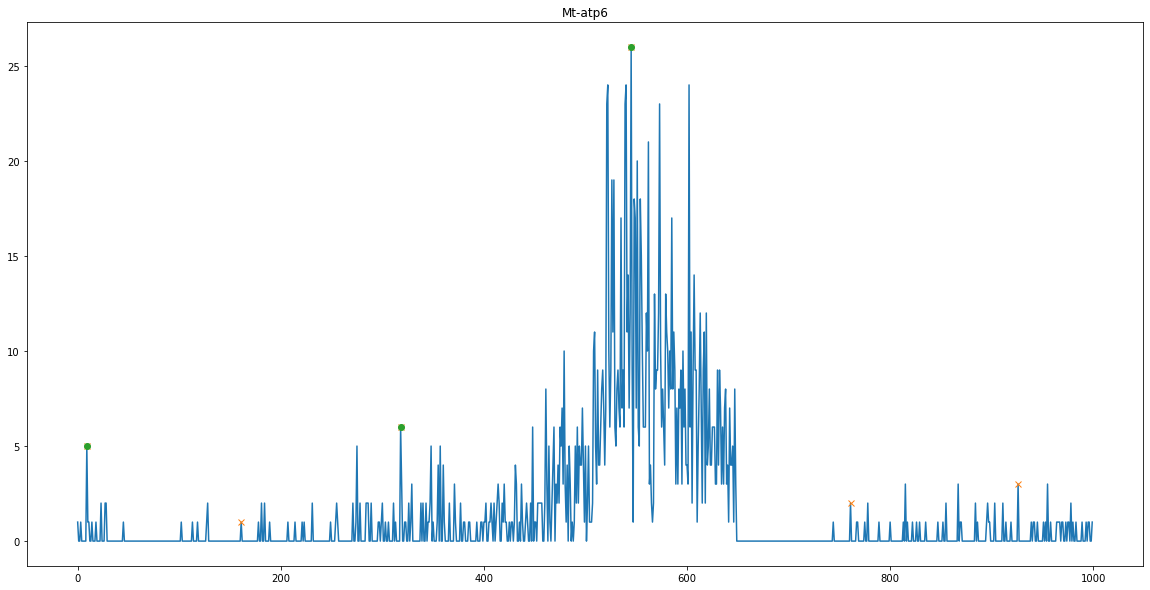

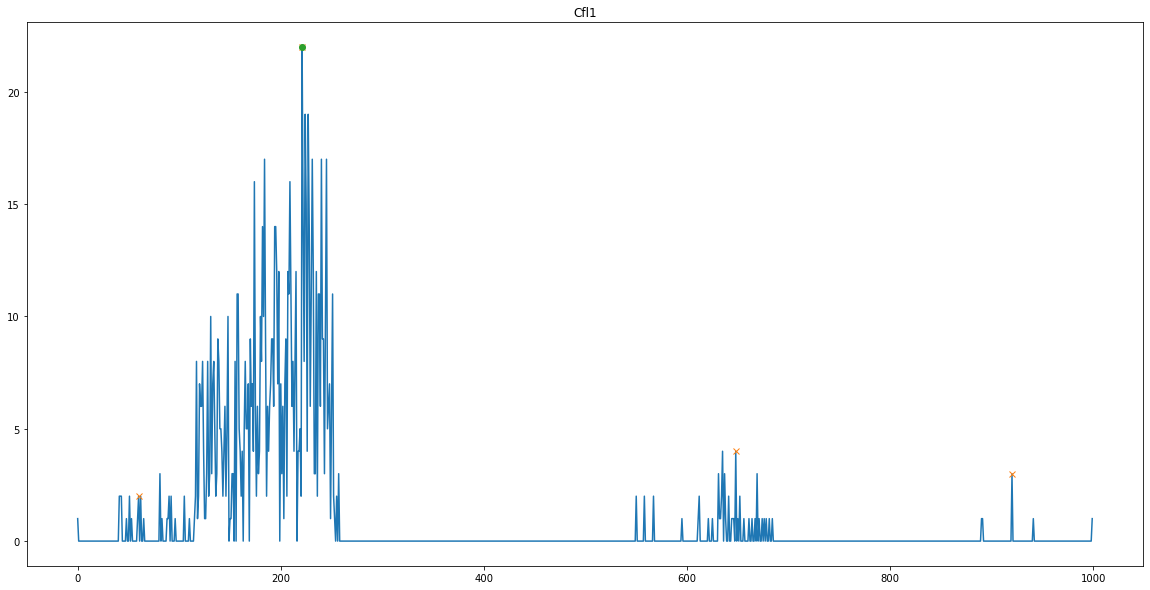

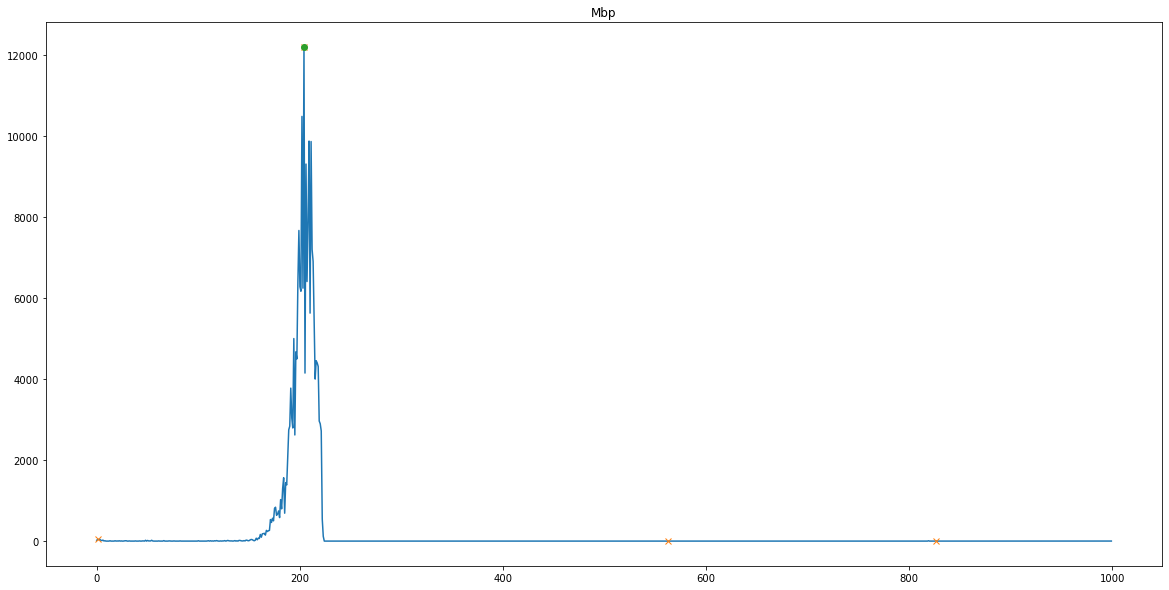

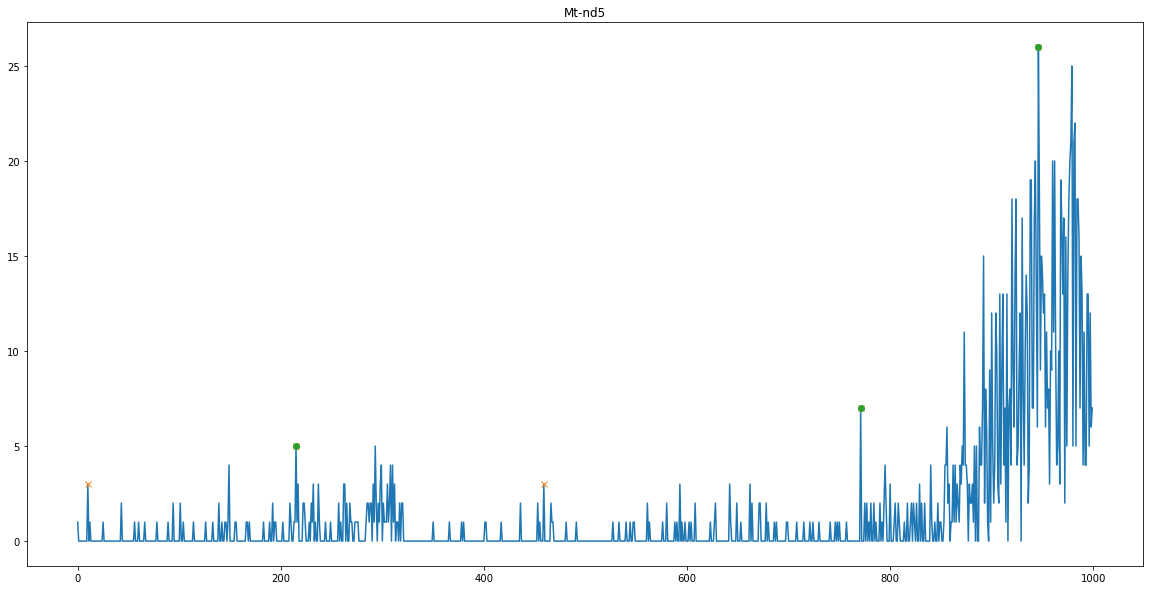

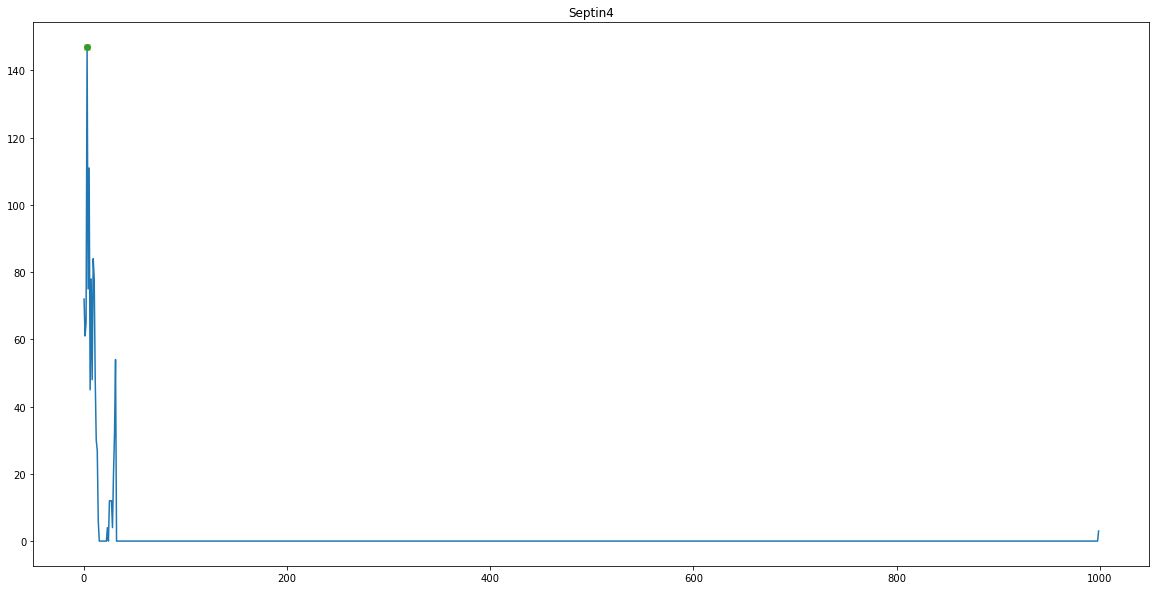

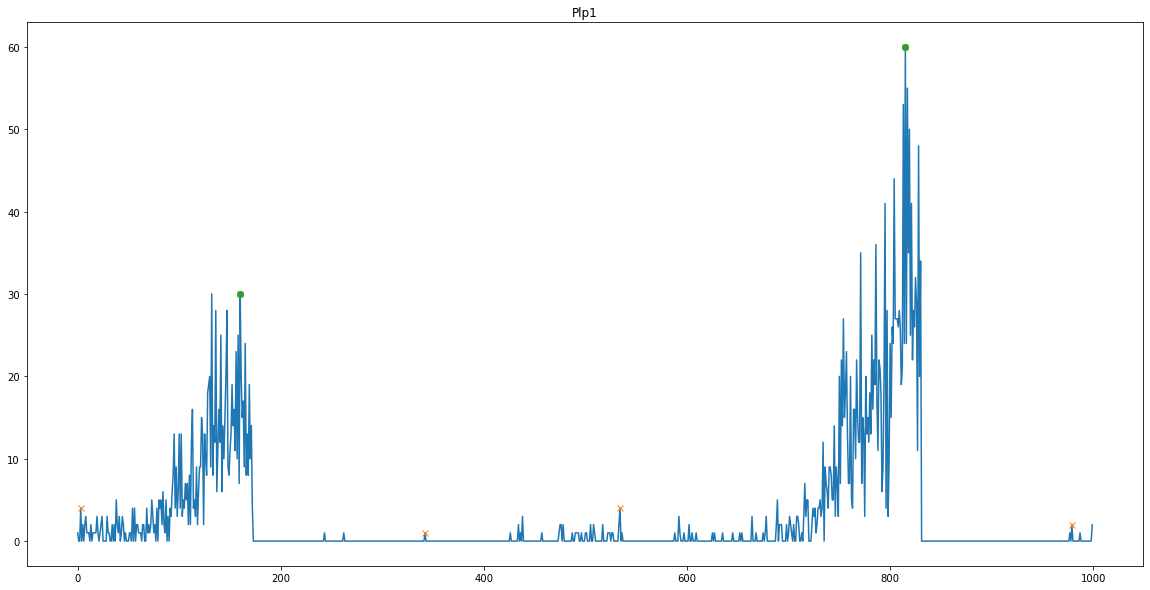

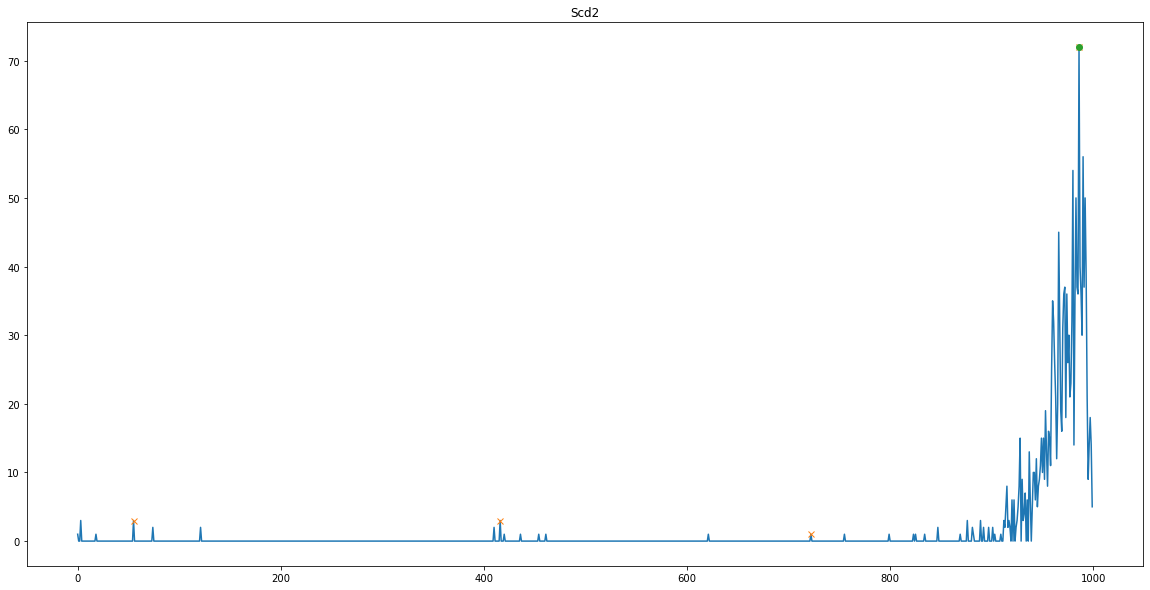

In [227]:
# Playground cell

# FIltered dataframe that only retains genes with more than 1000 total reads
fdf = df.groupby('gene_name').filter(lambda x: len(x) > 1000)

unique_gene_names = list(set(fdf['gene_name']))

for gene_name in unique_gene_names[:10]:
    gene_df = fdf[fdf['gene_name'] == gene_name]
    
    peaks = count_peaks(gene_df)
    print(gene_name, peaks, set(gene_df['exon_number']))

In [ ]:
# Dataframe 
# list of gene, loops over gene names, for every gene get those genes, datafram through function, [] every row different isoform, column gene name
genes = []
def isoform_genes(df):
    gene_names = df[df['gene_name']]
    for gene in gene_names: # filter for gene_name


In [ ]:
len(rolling_window(mbp_hist_y))

In [ ]:
# mbp_df['distance'].plot()
mobp_df['distance'].rolling(window=90).mean().plot() # window based on # of rows in average
# graphs look weird

In [ ]:
np.mean(mobp_density)
np.std(mobp_density)

In [ ]:
import numpy as np
import pylab

def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

In [ ]:
thresholding_algo([0,0,0,1,0], 2, 1, 1)

In [ ]:
1. analysis github (readme)
2. other data sets (sample size)
3. 